# Part 1 - Everything in a cell

In [1]:
5 + 8

13

In [2]:
6 * 8

48

# Part 2 - Working with code

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

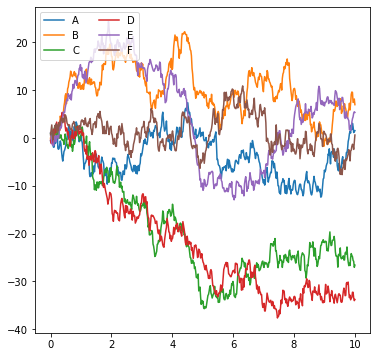

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

# Part 3 - Interacting with data

In [8]:
import requests
import pandas as pd

In [9]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [10]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-24 11:45:51.689275')

In [11]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [12]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

## Bitcoin

In [13]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-24 12:00:00,19039,19096,19005,19055,24.747620,4.715599e+05
2022-09-24 13:00:00,19054,19196,19054,19157,34.883426,6.667362e+05
2022-09-24 14:00:00,19156,19219,19109,19121,33.782288,6.474302e+05
2022-09-24 15:00:00,19123,19136,19064,19085,61.450851,1.173612e+06
2022-09-24 16:00:00,19088,19117,19025,19117,37.530658,7.155834e+05


<AxesSubplot:xlabel='CloseTime'>

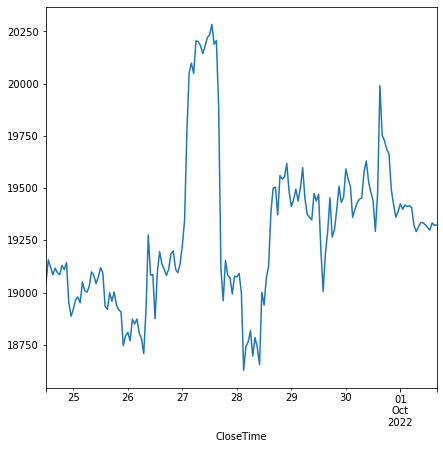

In [15]:
btc['ClosePrice'].plot(figsize=(7,7))

## Ether

In [16]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-24 12:00:00,1325.6,1331.9,1324.1,1327.0,546.465272,7.261077e+05
2022-09-24 13:00:00,1327.4,1336.0,1326.2,1331.6,336.467904,4.475409e+05
2022-09-24 14:00:00,1331.9,1347.7,1331.4,1342.9,930.070894,1.247544e+06
2022-09-24 15:00:00,1342.9,1348.9,1340.2,1342.3,746.987067,1.004118e+06
2022-09-24 16:00:00,1342.7,1345.5,1333.5,1340.0,781.456455,1.046113e+06


<AxesSubplot:xlabel='CloseTime'>

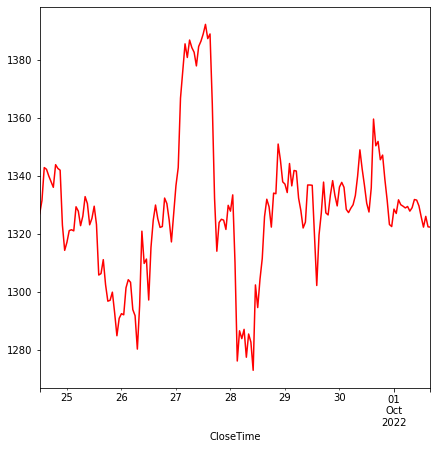

In [17]:
eth['ClosePrice'].plot(figsize=(7, 7),color='red')

# Bonus: Dynamic plots with Bokeh

In [18]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [19]:
output_notebook()

Loading BokehJS ...

In [22]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Price'
p1.yaxis.axis_label = 'Date'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_right"

show(p1)

# Part 4: Exporting to Excel

In [27]:
writer = pd.ExcelWriter('cryptos.xlsx')
btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Ether')
writer.save()